### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성 청년 SW아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

## **🔍 Objectives**

### **1. 실습 개요**

- 📝 **비정형 데이터 EDA와 전처리**  

---

### **2. 실습 진행 목적 및 배경**
- 본 실습은 텍스트 데이터를 다루며, **데이터 분석(EDA)**, **정제(Cleaning)**, **전처리(Preprocessing)** 기술을 직접 적용합니다.  
- 학습자는 실제 데이터셋을 다루며 **결측값**, **이상치**, **중복 데이터** 처리 방법을 배우고, 데이터 품질을 개선하는 기술을 익힙니다.  

---

### **3. 실습 수행으로 얻어갈 수 있는 역량**
- **비정형 데이터의 EDA 기술 학습**  
- **비정형 데이터의 전처리 방법 습득**  

---

### **4. 데이터셋 개요 및 저작권 정보**

#### **📁 데이터 개요**

**비정형 데이터**  
- **데이터셋 이름**: [네이버 영화 리뷰 데이터](https://github.com/e9t/nsmc)  
- **내용**: 영화 리뷰 데이터를 활용한 **긍부정 분석** 데이터셋  
- **저작권**: 이 데이터셋은 공개된 네이버 영화 리뷰 데이터를 기반으로 제작되었으며, 학술적 연구 목적으로 사용 가능합니다.
- **컬럼명 설명**:  
  - `id`: 리뷰 ID  
  - `document`: 리뷰 내용  
  - `label`: 긍정(1) 또는 부정(0) 라벨  

---

### **5. 실습 핵심 내용**
- **비정형 데이터**의 **EDA**  
- **비정형 데이터**의 **전처리**  


### **Prerequisites**

```
numpy==1.26.4
pandas==2.2.2
matplotlib==3.8.0
seaborn==0.13.2
konlpy==0.6.0
```


---------------------------------------------


# 비정형 데이터 : 네이버 영화 리뷰 데이터 실습(한국어 데이터)


In [ ]:
# 필요한 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔 폰트를 matplotlib에 설정
plt.rc('font', family='NanumGothic')

# seaborn을 예쁘게 그리기 위한 설정
sns.set_style("whitegrid")


## 1. 데이터 EDA

### 1-1. 데이터 CSV 파일로 불러오기

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

# 업로드된 데이터셋 압축 해제 코드
!unzip /content/drive/MyDrive/3강_데이터파일.zip -d /content/drive/MyDrive

Mounted at /content/drive
Archive:  /content/drive/MyDrive/실습_3강1.zip
replace /content/drive/MyDrive/naver_movie_review.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/__MACOSX/._naver_movie_review.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/xAPI-Edu-Data1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/__MACOSX/._xAPI-Edu-Data1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import os
# my_path: 각자 데이터셋 파일이 있는 경로로 설정 바랍니다.
my_path = "/content/gdrive/MyDrive/"

if not os.path.exists(my_path):
    os.makedirs(my_path)
    print(f"'{my_path}' 폴더가 생성되었습니다.")
else:
    print(f"'{my_path}' 폴더가 이미 존재합니다.")

In [ ]:
# read_csv() 이용해서 데이터 불러오기.

# 데이터셋 Load 코드
text_df=pd.read_csv(f'{my_path}/naver_movie_review.csv')

### 1-2. 데이터프레임의 각 컬럼 확인하기

#### head(), tail()로 데이터 일부만 확인

In [ ]:
# head() 이용해서 데이터 일부만 확인

text_df.head()

,id,document,label
0,7757680,앞으로도 없을듯...,1
1,6311301,큐브릭은 아무나 하나~~ 그 누가 쉽다고 했나~~,0
2,7805087,"이런 드라마,,, 다시 만나기 힘들 겁니다. 아시겠습니까?",1
3,6824254,더빙땜에 영화보다 짜증나긴 처음이네... 보라를 도대체 왜쓴거임??,0
4,8565456,감독이 중국인인줄 알았네 상당히 중국스런 영화 다니엘 헤니 연기가 아깝다 앞으로 좀...,0


In [ ]:
# tail() 이용해서 데이터 일부만 확인
# 마지막 몇 줄을 확인할 때 사용하는 판다스 메서드

text_df.tail()

,id,document,label
995,7473044,김희선은 항상 한결같이 맑고 순수한 이미지에 연기실력도 대단한 여자다.,1
996,8627696,10글자를채우자랄라,1
997,8925379,제발 다시 이런 드라마 제작 부탁드려요sbs 관계자님들 다른 방송사들은힘들듯 ㅠ,1
998,9537418,"저에게 있어서 9점이 만점입니다 삶에 대한 회의는 누구에게나 있을 것 같습니다,그런...",1
999,6121921,굿~~,1


#### info()로 데이터 대략적으로 확인

In [ ]:
# info() 로 데이터 대략적으로 확인

text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1000 non-null   int64 
 1   document  1000 non-null   object
 2   label     1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


#### 결측값 확인

In [ ]:
#결측값 확인

text_df.isnull().sum()

,0
id,0
document,0
label,0


In [ ]:
# 결측값 제거

text_df=text_df.dropna()
text_df.isnull().sum()

,0
id,0
document,0
label,0


### 1-3. 문장의 길이 및 평균 길이 확인하기

리뷰 문장의 평균 길이는 데이터 품질을 평가하고 지나치게 짧거나 긴 리뷰를 제거해 데이터 정제를 돕는다. 자연어 처리 모델 학습 최적화를 위해 적절한 문장 길이를 파악하는 데 활용된다. 또한, 리뷰 길이는 사용자의 의도와 행동을 분석하는 데 중요한 지표가 될 수 있다.

In [ ]:
# 문장의 길이 계산

# 결측값을 빈 문자열로 대체
text_df['document']=text_df['document'].fillna("")

# 문장 길이 계산해서 sentence_length 열에 저장
text_df['sentence_length']=text_df['document'].apply(lambda x:len(x))
text_df.head()

,id,document,label,sentence_length
444,6922462,최고의 미드!!!!!!!!!!!!!!!!!!!!!!!!!!!,1,33
898,7859137,재밋슴,1,3
186,9329339,"전쟁, 사랑, 책임, 모성애. 겉만 번지르르한 미안함이 마음을 불편하게 한다. 지금...",1,94
584,5796279,재미없어..,0,6
664,3841366,이 영화를 만든 제작진 일동에게 조의를.,0,22


In [ ]:
# 평균 길이 계산

average_length = text_df['sentence_length'].mean()
print(f"평균 문장 길이: {average_length}")


평균 문장 길이: 35.496


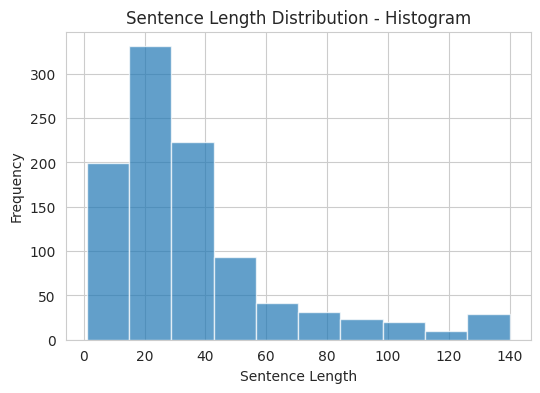

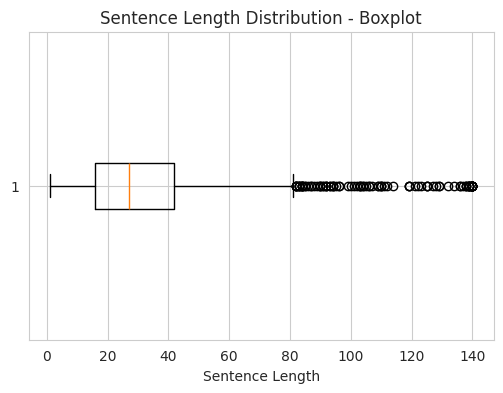

In [ ]:
# 분포 그래프로 평균 길이 시각적으로 확인

# 히스토그램 그리기

plt.figure(figsize=(6, 4))
plt.hist(text_df['sentence_length'], alpha=0.7)
plt.title('Sentence Length Distribution - Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

# 박스플롯 그리기

plt.figure(figsize=(6, 4))
plt.boxplot(text_df['sentence_length'], vert=False)
plt.title('Sentence Length Distribution - Boxplot')
plt.xlabel('Sentence Length')
plt.show()

In [ ]:
# 리뷰 중복값 확인
duplicates = text_df[text_df.duplicated(subset='document', keep=False)]  # keep=False는 중복된 모든 행 표시

# 리뷰 중복값 개수
num_duplicates = text_df.duplicated(subset='document').sum()
print(f"중복 리뷰 개수: {num_duplicates}")


중복 리뷰 개수: 1


## 2. 전처리

### 2-1. 결측값처리

In [ ]:
text_df.isnull().sum()

,0
id,0
document,0
label,0
sentence_length,0


In [ ]:
# 결측값을 아예 제거

text_df = text_df.dropna(subset=['document'])  # document에 결측값이 있으니 결측값이 있는 행은 제거.


In [ ]:
text_df.isnull().sum()

,0
id,0
document,0
label,0
sentence_length,0


### 2-2. 문장부호 제거

- string.punctuation:

  - 파이썬에서 제공하는 모든 문장부호 문자 목록입니다.
  - 포함된 문장부호: !"#$%&'()*+,-./:;<=>?@[\]^_{|}~

- str.maketrans()와 translate():

  - str.maketrans()를 사용해 문자 치환 규칙을 생성하고, translate()를 통해 해당 규칙에 따라 문자를 변환(삭제)합니다.


In [ ]:
# 문장부호 제거

# string.punctuation은 모든 문장부호 (!"#$%&'()*+,-./:;<=>?@[\]^_{|}~`)를 포함한다.

import string

# 문장부호 제거 함수
def remove_punctuation(text):
    if isinstance(text, str):  # 문자열인지 확인
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

# 문장부호 제거 적용
text_df['document_cleaned']=text_df['document'].apply(remove_punctuation)

text_df.head()

,id,document,label,sentence_length,document_cleaned
444,6922462,최고의 미드!!!!!!!!!!!!!!!!!!!!!!!!!!!,1,33,최고의 미드
898,7859137,재밋슴,1,3,재밋슴
186,9329339,"전쟁, 사랑, 책임, 모성애. 겉만 번지르르한 미안함이 마음을 불편하게 한다. 지금...",1,94,전쟁 사랑 책임 모성애 겉만 번지르르한 미안함이 마음을 불편하게 한다 지금은 멀쩡해...
584,5796279,재미없어..,0,6,재미없어
664,3841366,이 영화를 만든 제작진 일동에게 조의를.,0,22,이 영화를 만든 제작진 일동에게 조의를


### 2-3. 어간 추출 및 표제어 추출

In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 27.6 MB/s eta 0:00:00


#### 형태소 분석 테스트

In [ ]:
# 형태소 분석 (morphs) 테스트

from konlpy.tag import Okt

okt = Okt()
text = "오늘은 날씨가 정말 좋네요."

# 형태소 분석
morphs = okt.morphs(text)
print(morphs)


['오늘', '은', '날씨', '가', '정말', '좋네요', '.']


#### 품사 태깅 테스트

In [ ]:
# 품사 태깅 테스트

from konlpy.tag import Okt

okt = Okt()
text = "오늘은 날씨가 정말 좋네요."
pos_tags = okt.pos(text)
print(pos_tags)

[('오늘', 'Noun'), ('은', 'Josa'), ('날씨', 'Noun'), ('가', 'Josa'), ('정말', 'Noun'), ('좋네요', 'Adjective'), ('.', 'Punctuation')]


#### 명사 추출 테스트

In [ ]:
# 명사 추출 테스트

from konlpy.tag import Okt

okt = Okt()
text = "오늘은 날씨가 정말 좋네요."

nouns = okt.nouns(text)
print(nouns)


['오늘', '날씨', '정말']


Okt 형태소 분석기를 활용해 텍스트에서 의미없는 단어를 제거하고 핵심적인 단어들(명사, 동사, 형용사)만 추출해 분석의 정확도를 높일 수 있다.
- 단어의 기본형(어간)을 추출하여 단어의 변형을 하나의 형태로 통일할 수 있다. 이는 단어의 의미를 일관되게 유지하여 텍스트 분석의 효율성을 높인다.
- 분석에 불필요한 품사인 조사, 부사, 감탄사 등을 제거해 텍스트의 노이즈를 줄인다.


#### 리뷰 데이터에 형태소 분석 적용

In [ ]:
# Okt 형태소 분석

from konlpy.tag import Okt

okt=Okt()

def extract_stem(text):
    if isinstance(text, str):
        # 품사가 명사, 동사, 형용사인것만 남기기
        stemmed_words=[word for word, pos in okt.pos(text, norm=True, stem=True) if pos in ['Noun', 'Verb', 'Adjective']]
        return ' '.join(stemmed_words)
    return text

# 함수 적용
text_df['stemmed_document']=text_df['document_cleaned'].apply(extract_stem)


In [ ]:
text_df.head()

,id,document,label,sentence_length,document_cleaned,stemmed_document
71018,7757680,앞으로도 없을듯...,1,11,앞으로도 없을듯,앞 없다
9208,6311301,큐브릭은 아무나 하나~~ 그 누가 쉽다고 했나~~,0,27,큐브릭은 아무나 하나 그 누가 쉽다고 했나,큐브릭 아무나 하나 그 누가 쉬다 하다
60752,7805087,"이런 드라마,,, 다시 만나기 힘들 겁니다. 아시겠습니까?",1,32,이런 드라마 다시 만나기 힘들 겁니다 아시겠습니까,이렇다 드라마 다시 만나다 힘들다 겁니다 알다
45776,6824254,더빙땜에 영화보다 짜증나긴 처음이네... 보라를 도대체 왜쓴거임??,0,37,더빙땜에 영화보다 짜증나긴 처음이네 보라를 도대체 왜쓴거임,더빙 땜 영화 짜증나다 처음 보라 도대체 왜 쓸다 임
12751,8565456,감독이 중국인인줄 알았네 상당히 중국스런 영화 다니엘 헤니 연기가 아깝다 앞으로 좀...,0,57,감독이 중국인인줄 알았네 상당히 중국스런 영화 다니엘 헤니 연기가 아깝다 앞으로 좀...,감독 중국인 줄 알다 상당하다 중국 영화 다니엘 헤 연기 아깝다 앞 좀 더 자주 보다


### 2-4. 불용어 제거

불용어(Stopwords)란, 텍스트 데이터 분석에서 의미를 크게 가지지 않거나 분석 목적에 불필요한 단어

- import re:

  - 파이썬의 정규 표현식 모듈로, 문자열 패턴 검색, 대체, 분리 등을 처리.
  - 여기서는 re.sub()를 사용해 불용어와 정확히 일치하는 단어를 찾아 제거.

In [ ]:
# 사용자 정의 불용어 리스트로 불용어 제거하기

import re  # 정규 표현식(Regular Expression)을 활용한 문자열 처리 모듈

# 사용자 정의 불용어 리스트 - 편집해서 사용해도 됨
stopwords=[
    '이', '의', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '주', '아니',
    '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하',
    '은', '는'
]

# 불용어 제거 함수
def remove_stopwords(text, stopwords):
    if isinstance(text, str):
        for word in stopwords:
            text=re.sub(r'\b' + re.escape(word) + r'\b', '', text)
        return text.strip()
    return text

# 불용어 제거 적용
text_df["cleaned_document"]=text_df["stemmed_document"].apply(lambda x: remove_stopwords(x, stopwords))

text_df.head()

,id,document,label,sentence_length,document_cleaned,stemmed_document,cleaned_document
444,6922462,최고의 미드!!!!!!!!!!!!!!!!!!!!!!!!!!!,1,33,최고의 미드,최고 미드,최고 미드
898,7859137,재밋슴,1,3,재밋슴,재밌슴,재밌슴
186,9329339,"전쟁, 사랑, 책임, 모성애. 겉만 번지르르한 미안함이 마음을 불편하게 한다. 지금...",1,94,전쟁 사랑 책임 모성애 겉만 번지르르한 미안함이 마음을 불편하게 한다 지금은 멀쩡해...,전쟁 사랑 책임 모성애 겉 번지르르하다 미안하다 마음 불편하다 하다 지금 멀쩡하다 ...,전쟁 사랑 책임 모성애 겉 번지르르하다 미안하다 마음 불편하다 하다 지금 멀쩡하다 ...
584,5796279,재미없어..,0,6,재미없어,재미없다,재미없다
664,3841366,이 영화를 만든 제작진 일동에게 조의를.,0,22,이 영화를 만든 제작진 일동에게 조의를,이 영화 만들다 제작 진 일동 조의,영화 만들다 제작 진 일동 조의


비정형 데이터 전처리 완료! 👼

  전처리가 모두 적용된 cleaned_document 값을 사용하면 된다.